Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Input,Dense
from keras.models import Model


Importing the dataset

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

In [3]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

#feature scaling -> Normalization 

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
x_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
# Flattening the x_train & x_test
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [46]:

def show_visual(data,title,size=10,width=28,height=28):
    plt.figure(figsize=(10,5))
    for i in range(size):
        ax=plt.subplot(1,size,i+1)
        plt.imshow(data[i].reshape(width,height))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title,fontsize=20)

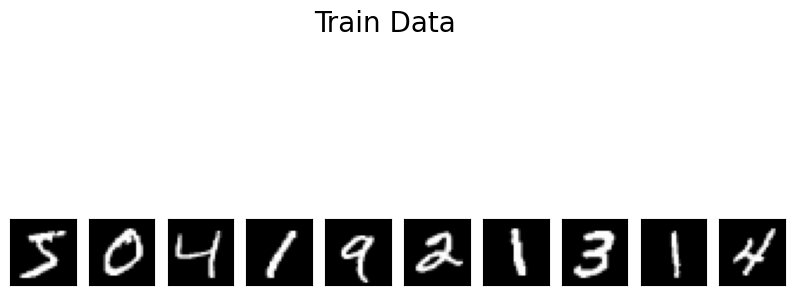

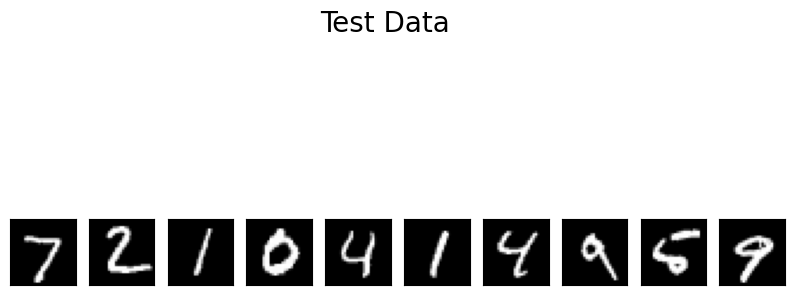

In [17]:
show_visual(x_train,"Train Data")
show_visual(x_test,"Test Data")

In [24]:
input_dim,output_dim=784,784
encode_dim=100
hidden_dim=256

In [33]:
#Encoders
input_layer=Input(shape=(input_dim,),name="INPUT")
hidden_layer_1=Dense(hidden_dim,activation='relu',name="Hidden_1")(input_layer)

In [34]:
#Bottleneck
bottle_neck=Dense(encode_dim,activation='relu',name="BOTTLE_NECK")(hidden_layer_1)

In [35]:
#Decoder
hidden_layer_2=Dense(hidden_dim,activation='relu',name="Hidden_2")(bottle_neck)
output_layer=Dense(output_dim,activation='sigmoid',name='OUTPUT')(hidden_layer_2)

In [36]:
model=Model(input_layer,output_layer)

In [37]:
model.compile(optimizer='adam',loss="binary_crossentropy")

In [38]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_1 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ BOTTLE_NECK (Dense)                  │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_2 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OUTPUT (Dense)                       │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,004 (1.73 MB)

 Trainable params: 454,004 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(x_train,x_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 0.1586
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.0815
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0738
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0724
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0714
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0708
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.0702
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0699
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0696


In [40]:
decoded_data=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [43]:
get_encoded_data=Model(inputs=model.input,outputs=model.get_layer('BOTTLE_NECK').output)

In [44]:
encoded_data=get_encoded_data.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


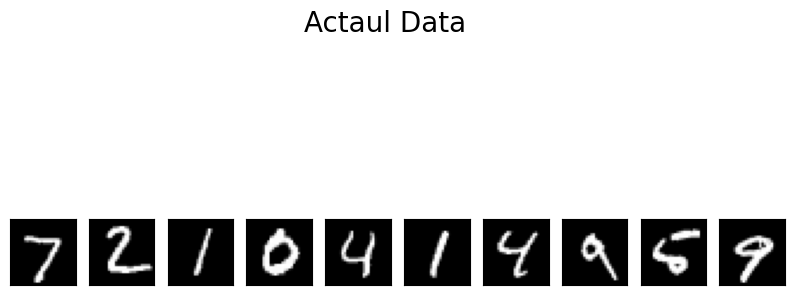

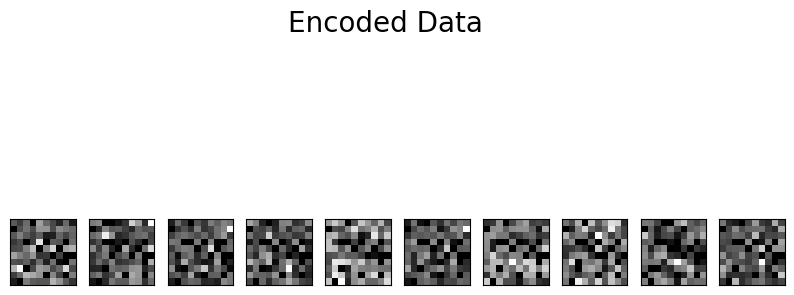

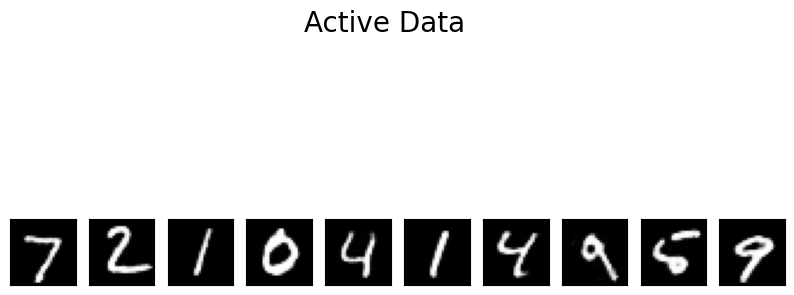

In [47]:
show_visual(x_test,title='Actaul Data')
show_visual(encoded_data,title="Encoded Data",width=10,height=10)
show_visual(decoded_data,title="Active Data")